In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/digits.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pca = PCA(n_components=2, random_state=27)
scaled_data = StandardScaler().fit_transform(
    data.drop(['label'], axis=1)
)

pca.fit_transform(scaled_data)

round(np.sum(pca.explained_variance_ratio_),4)

0.0986

In [4]:
wcss = []


for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(data.drop(['label'], axis=1))
    # km.fit(scaled_data)
    wcss.append(km.inertia_)

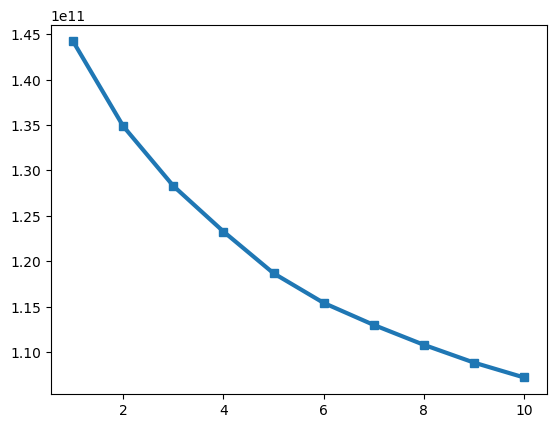

In [5]:
plt.plot(range(1,11), wcss, linewidth=3, marker='s')
plt.show()

In [6]:
import umap

/Users/evgenijgrinev/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
um = umap.UMAP(n_neighbors=5, min_dist=.3, metric='correlation')
y_means = um.fit_transform(data)

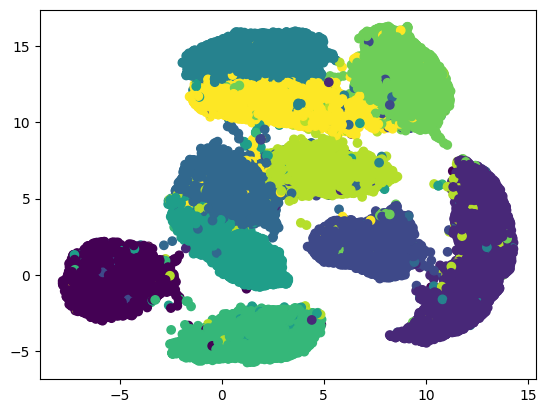

In [8]:
plt.scatter(x=y_means[:,0], y=y_means[:,1], c=data['label'])
plt.show()